In [121]:
from fasta_iterator_class import FASTAReader
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

In [25]:
nt_sequences = FASTAReader(open("seqdump.txt",'r'))
protein_alignment=FASTAReader(open('prot_alignment.txt','r'))
nt_alignment = open("nt_alignmnet.fa", "w")

counter = 0
for nuc,prot in zip(nt_sequences, protein_alignment):
    if counter <= 10:
        nt_alignment.write(nt[0]+'\n')
        counter+=1


In [55]:
nt_sequences=FASTAReader(open("seqdump.txt",'r'))
protein_alignment=FASTAReader(open('prot_alignment.txt'))
nt_alignment=open("nt_alignmnet.fa","w+")
nt_alignment.write(">query" + '\n')
for nt,prot in zip(nt_sequences,protein_alignment):
    nt_alignment.write('>' + nt[0]+"\n")
    seqwgaps=""
    nt_count=0
    prot_count=0
    protein=prot[1]
    dna=nt[1]
    while prot_count<len(protein):
        if protein[prot_count]=="-":
            seqwgaps+="---"
        else:
            seqwgaps+=dna[nt_count:nt_count+3]
            nt_count+=3
        prot_count+=1
    nt_alignment.write(seqwgaps+"\n")
nt_alignment.close()

In [ ]:
week4 = FASTAReader(open("week4_query.fa", 'r'))

ref=''
count=0
query_list = []
for query in week4:
    if count<=1:
        ref=query[1]
        count+=1

In [168]:
gapnt=FASTAReader(open("nt_alignmnet_modified.fa",'r'))
##query=FASTAReader(open('week4_query.fa', 'r'))


codontable = {
'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W'
}


dN = []
dS = []


ref=''
count=0
query_list = []
for query in gapnt:
    if count<1:
        ref=query[1]
        count+=1

gapped2 = FASTAReader(open("nt_alignmnet_modified.fa",'r'))
counter=0
for line in gapped2:
    if counter >= 1:
        query_list.append(line[1])
    counter+=1

        
for codon in range(0, len(ref), 3):

    dS_temp = 0
    dN_temp = 0
    
    if ref[codon:codon+3] == '---': 
    ##or ref[codon:codon+3] not in codontable:
        pass
    
    else:
        
        nuc1 = ref[codon:codon+3]
        ref_aa = codontable[nuc1]
        
        for compare in query_list:
            
            if compare[codon:codon+3] == '---' or compare[codon:codon+3] not in codontable:
                
                pass
            
            else:
                
                nuc2 = compare[codon:codon+3]
                query_aa = codontable[nuc2]
    
        
                if (nuc1 != nuc2) and (ref_aa == query_aa):
                    dS_temp += 1

                elif (nuc1 != nuc2) and (ref_aa != query_aa):
                    dN_temp += 1
                
        dS.append(dS_temp)
        dN.append(dN_temp)

            


In [169]:
dN

[522,
 288,
 554,
 600,
 598,
 580,
 619,
 641,
 633,
 630,
 838,
 834,
 734,
 654,
 758,
 756,
 791,
 848,
 826,
 840,
 856,
 856,
 832,
 830,
 624,
 831,
 622,
 838,
 845,
 773,
 873,
 901,
 916,
 853,
 819,
 853,
 807,
 948,
 937,
 763,
 797,
 861,
 887,
 963,
 901,
 891,
 854,
 698,
 927,
 894,
 904,
 936,
 960,
 957,
 725,
 866,
 889,
 860,
 728,
 874,
 869,
 874,
 712,
 747,
 878,
 718,
 881,
 853,
 895,
 874,
 682,
 885,
 889,
 708,
 883,
 885,
 881,
 889,
 891,
 892,
 697,
 573,
 906,
 755,
 947,
 954,
 973,
 921,
 941,
 933,
 916,
 792,
 856,
 794,
 817,
 890,
 910,
 864,
 934,
 800,
 804,
 971,
 935,
 821,
 851,
 869,
 882,
 668,
 532,
 688,
 729,
 711,
 736,
 491,
 698,
 724,
 690,
 726,
 707,
 742,
 869,
 830,
 856,
 874,
 823,
 837,
 870,
 690,
 901,
 810,
 831,
 564,
 728,
 732,
 705,
 720,
 731,
 712,
 715,
 580,
 718,
 848,
 857,
 881,
 676,
 729,
 869,
 862,
 951,
 948,
 740,
 918,
 803,
 966,
 883,
 778,
 879,
 885,
 857,
 870,
 940,
 961,
 947,
 820,
 942,
 981,
 943

In [209]:
gapnt=FASTAReader(open("nt_alignmnet-Copy1.fa",'r'))
##query=FASTAReader(open('week4_query.fa', 'r'))


codontable = {
'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W'
}


dN = []
dS = []
dN_dict = {}
dS_dict = {}


ref=''
count=0
query_list = []
for query in gapnt:
    if count<=1:
        ref=query[1]
        count+=1

gapped2 = FASTAReader(open("nt_alignmnet.fa",'r'))
counter=0
for line in gapped2:
    if count >= 1:
        query_list.append(query[1])
        counter+=1

for compare in query_list:

    dS_temp = 0
    dN_temp = 0
    
    for codon in range(0,(len(ref)),3):
        
        
        
        if ref[codon:codon+3] == '---' or compare[codon:codon+3] == '---' or ref[codon:codon+3] not in codontable or compare[codon:codon+3] not in codontable:
            pass
        
        else:
            nuc1 = ref[codon:codon+3]
            ref_aa = codontable[nuc1]
        
            nuc2 = compare[codon:codon+3]
            com_aa = codontable[nuc2]
        
            if (nuc1 != nuc2) and (ref_aa == query_aa):
                #dS_temp += 1
                if codon not in dS_dict:
                    dS_dict[codon]=(0)
                else:
                    dS_dict[codon]+=1
            elif (nuc1 != nuc2) and (ref_aa != query_aa):
                if codon not in dN_dict:
                    dN_dict[codon]=(0)
                else:
                    dN_dict[codon]+=1


In [97]:
gapnt=FASTAReader(open("nt_alignmnet_josh.fa",'r'))
##query=FASTAReader(open('week4_query.fa', 'r'))


codontable = {
'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W'
}


dN = []
dS = []


ref=''
count=0
query_list=[]
for query in gapnt:
    if count==0:
        ref=query[1]
    else:
        query_list.append(query[1])
    count+=1
dN=[]
dN_site=[]
dS=[]
dS_site=[]
for codon in range(0, len(ref), 3):

    dS_temp = 0
    dN_temp = 0
    
    if ref[codon:codon+3] == '---': 
    ##or ref[codon:codon+3] not in codontable:
        pass
    
    else:
        
        nuc1 = ref[codon:codon+3]
        ref_aa = codontable[nuc1]
        
        for compare in query_list:
            
            if compare[codon:codon+3] == '---' or compare[codon:codon+3] not in codontable:
                
                pass
            
            else:
                
                nuc2 = compare[codon:codon+3]
                query_aa = codontable[nuc2]
    
        
                if (nuc1 != nuc2) and (ref_aa == query_aa):
                    dS_temp += 1

                elif (nuc1 != nuc2) and (ref_aa != query_aa):
                    dN_temp += 1
                
        dS.append(dS_temp)
        dN.append(dN_temp)

            


In [98]:
dN

[522,
 288,
 554,
 600,
 598,
 580,
 619,
 641,
 633,
 630,
 838,
 834,
 734,
 654,
 758,
 756,
 791,
 848,
 826,
 840,
 856,
 856,
 832,
 830,
 624,
 831,
 622,
 838,
 845,
 773,
 873,
 901,
 916,
 853,
 819,
 853,
 807,
 948,
 937,
 763,
 797,
 861,
 887,
 963,
 901,
 891,
 854,
 698,
 927,
 894,
 904,
 936,
 960,
 957,
 725,
 866,
 889,
 860,
 728,
 874,
 869,
 874,
 712,
 747,
 878,
 718,
 881,
 853,
 895,
 874,
 682,
 885,
 889,
 708,
 883,
 885,
 881,
 889,
 891,
 892,
 697,
 573,
 906,
 755,
 947,
 954,
 973,
 921,
 941,
 933,
 916,
 792,
 856,
 794,
 817,
 890,
 910,
 864,
 934,
 800,
 804,
 971,
 935,
 821,
 851,
 869,
 882,
 668,
 532,
 688,
 729,
 711,
 736,
 491,
 698,
 724,
 690,
 726,
 707,
 742,
 869,
 830,
 856,
 874,
 823,
 837,
 870,
 690,
 901,
 810,
 831,
 564,
 728,
 732,
 705,
 720,
 731,
 712,
 715,
 580,
 718,
 848,
 857,
 881,
 676,
 729,
 869,
 862,
 951,
 948,
 740,
 918,
 803,
 966,
 883,
 778,
 879,
 885,
 857,
 870,
 940,
 961,
 947,
 820,
 942,
 981,
 943

In [148]:
gapnt=FASTAReader(open("nt_alignmnet_modified.fa",'r'))
##query=FASTAReader(open('week4_query.fa', 'r'))


codontable = {
'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W'
}


gapped=FASTAReader(open("nt_alignmnet_modified.fa"))
ref=''
count=0
query_list=[]
for query in gapped:
    if count==0:
        ref=query[1]
    else:
        query_list.append(query[1])
    count+=1
dN=[]
dN_site=[]
dS=[]
dS_site=[]
        
for codon in range(0, len(ref), 3):

    dS_temp = 0
    dN_temp = 0
    
    if ref[codon:codon+3] == '---': 
    ##or ref[codon:codon+3] not in codontable:
        pass
    
    else:
        
        nuc1 = ref[codon:codon+3]
        ref_aa = codontable[nuc1]
        
        for compare in query_list:
            
            if compare[codon:codon+3] == '---' or compare[codon:codon+3] not in codontable:
                
                pass
            
            else:
                
                nuc2 = compare[codon:codon+3]
                query_aa = codontable[nuc2]
    
        
                if (nuc1 != nuc2) and (ref_aa == query_aa):
                    dS_temp += 1

                elif (nuc1 != nuc2) and (ref_aa != query_aa):
                    dN_temp += 1
                
        dS.append(dS_temp)
        dN.append(dN_temp)

            


In [149]:
dN

[522,
 288,
 554,
 600,
 598,
 580,
 619,
 641,
 633,
 630,
 838,
 834,
 734,
 654,
 758,
 756,
 791,
 848,
 826,
 840,
 856,
 856,
 832,
 830,
 624,
 831,
 622,
 838,
 845,
 773,
 873,
 901,
 916,
 853,
 819,
 853,
 807,
 948,
 937,
 763,
 797,
 861,
 887,
 963,
 901,
 891,
 854,
 698,
 927,
 894,
 904,
 936,
 960,
 957,
 725,
 866,
 889,
 860,
 728,
 874,
 869,
 874,
 712,
 747,
 878,
 718,
 881,
 853,
 895,
 874,
 682,
 885,
 889,
 708,
 883,
 885,
 881,
 889,
 891,
 892,
 697,
 573,
 906,
 755,
 947,
 954,
 973,
 921,
 941,
 933,
 916,
 792,
 856,
 794,
 817,
 890,
 910,
 864,
 934,
 800,
 804,
 971,
 935,
 821,
 851,
 869,
 882,
 668,
 532,
 688,
 729,
 711,
 736,
 491,
 698,
 724,
 690,
 726,
 707,
 742,
 869,
 830,
 856,
 874,
 823,
 837,
 870,
 690,
 901,
 810,
 831,
 564,
 728,
 732,
 705,
 720,
 731,
 712,
 715,
 580,
 718,
 848,
 857,
 881,
 676,
 729,
 869,
 862,
 951,
 948,
 740,
 918,
 803,
 966,
 883,
 778,
 879,
 885,
 857,
 870,
 940,
 961,
 947,
 820,
 942,
 981,
 943

In [150]:
dN_dS = []
for n,s in zip(dN,dS):
    dN_dS.append(n-s)
    
std=np.std(dN_dS)
zscore= []
for codon in dN_dS:
    zscore.append(codon/std)
p_values = (sts.norm.sf(zscore)) * 2

In [151]:
p_values

array([3.24959883e-04, 8.14886071e-01, 1.74783454e-04, ...,
       3.86300344e-10, 1.43289224e-07, 3.33920104e-08])

Text(0, 0.5, 'log2 dN/dS')

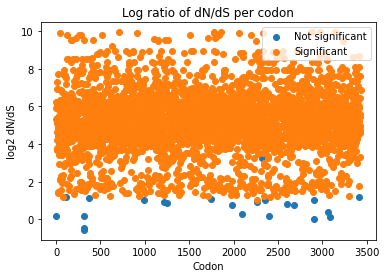

In [152]:
codon=[]
codon_sig = []
dNdS=[]
dNdS_sig  = []
for i in range(len(dN)):
    if dN[i]!=0 and dS[i]!=0 and p_values[i] > 0.05:
        dNdS.append(math.log((dN[i]/dS[i]),2))
        codon.append(i)
    elif dN[i]!=0 and dS[i]!=0 and p_values[i] < 0.05:
        dNdS_sig.append(math.log((dN[i]/dS[i]), 2))
        codon_sig.append(i)
plt.scatter(codon,dNdS, label = "Not significant")
plt.scatter(codon_sig,dNdS_sig, label = "Significant")
plt.title("Log ratio of dN/dS per codon")
plt.legend(loc = 'upper right')
plt.xlabel("Codon")
plt.ylabel("log2 dN/dS")